In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
from spafe.features.gfcc import gfcc

c:\Users\pokum\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [13]:
one = 'one.wav'
two = 'two.wav'


samplerate1, data1 = wavfile.read(one)
samplerate2, data2 = wavfile.read(two)
print('Audio Shape 1:',np.shape(data1),'Audio Shape 2:',np.shape(data2))

Audio Shape 1: (78072,) Audio Shape 2: (89592,)


In [6]:
sd.play(data1, samplerate1)
sd.wait()

In [7]:
sd.play(data2, samplerate2)
sd.wait()

In [15]:
duration1 = len(data1)/samplerate1
time1 = np.arange(0,duration1,1/samplerate1) #time vector

duration2 = len(data2)/samplerate2
time2 = np.arange(0,duration2,1/samplerate2) #time vector

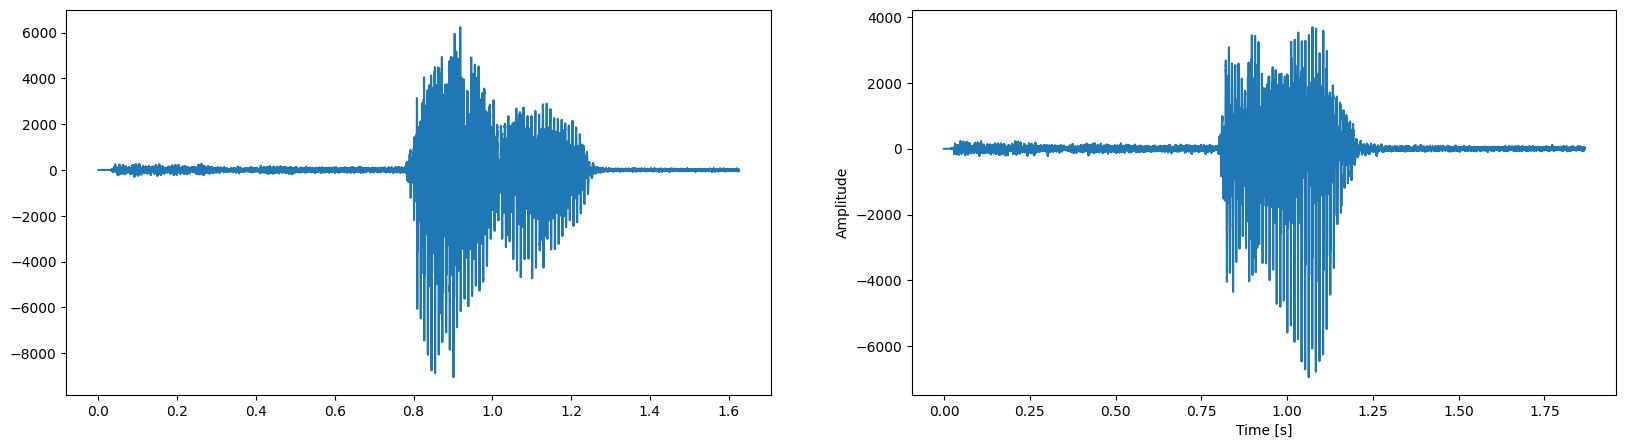

In [16]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

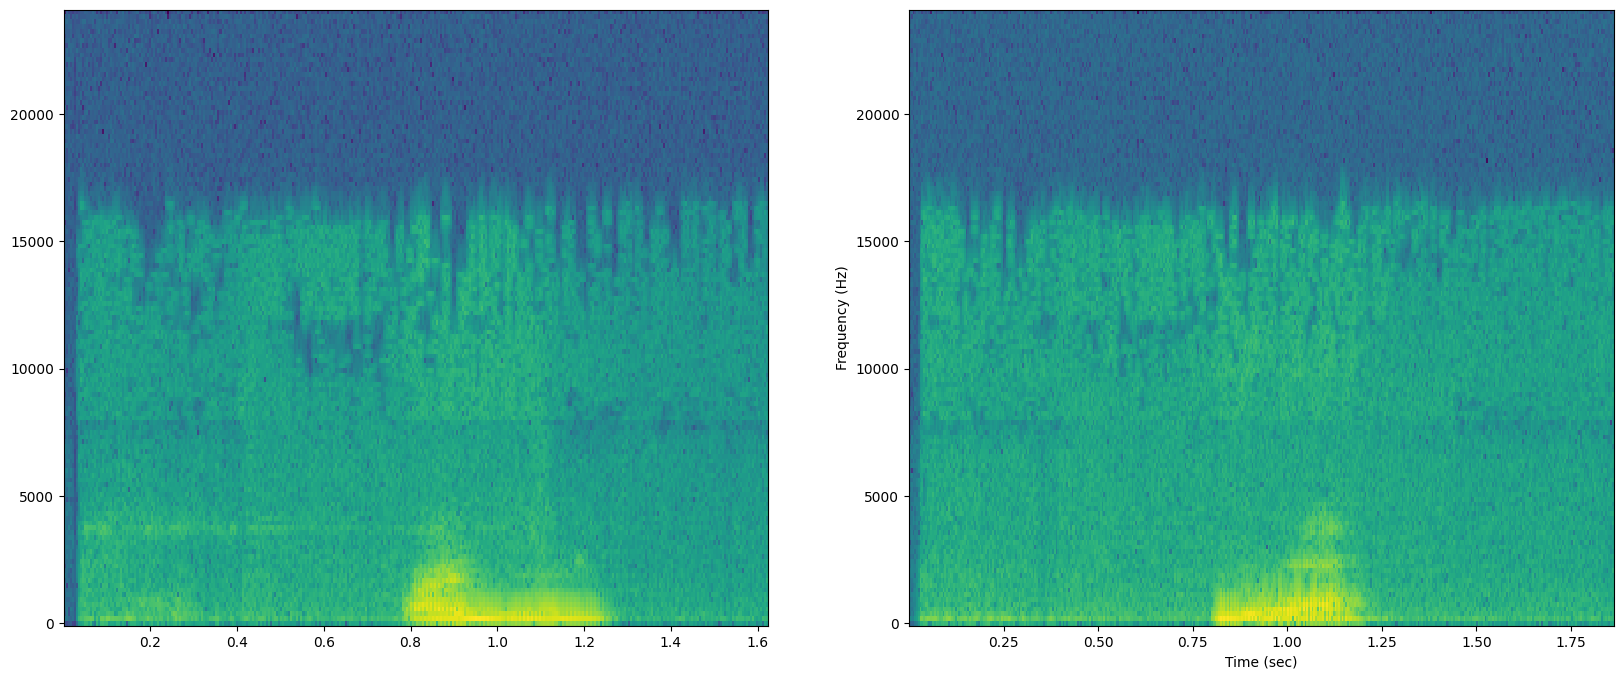

In [17]:
fig, axs = plt.subplots(1,2,figsize=(20, 8))
fr1, tm1, spgram1 = signal.spectrogram(data1,samplerate1)
fr2, tm2, spgram2 = signal.spectrogram(data2,samplerate2)

lspg1 = np.log(spgram1)
lspg2 = np.log(spgram2)
axs[0].pcolormesh(tm1,fr1,lspg1,shading='auto')
axs[1].pcolormesh(tm2,fr2,lspg2,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [18]:
samples1, sample_rate1 = librosa.load(one)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(two)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

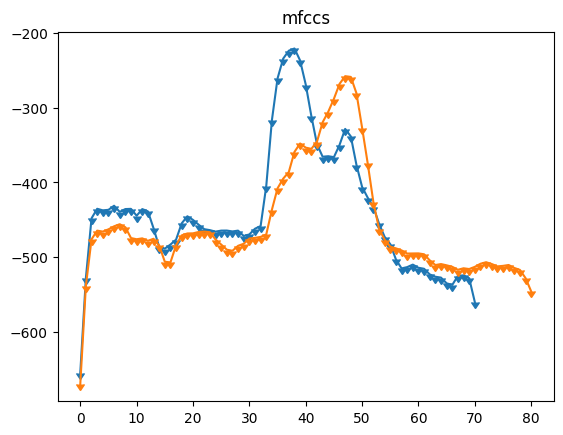

In [22]:
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(71,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(81,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [23]:
samples1, sample_rate1 = librosa.load(one)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(two)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)   

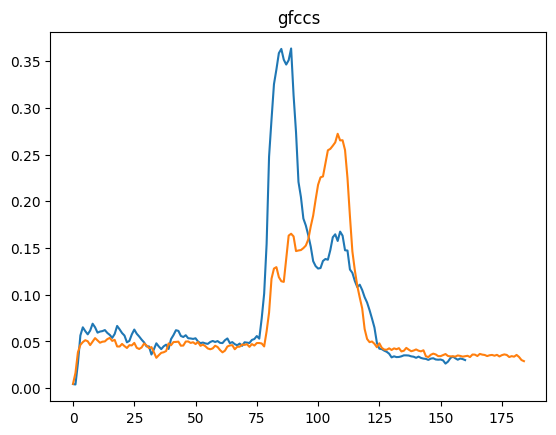

In [24]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Видим, что спектограммы практически одинаковые, различия проявляются из-за разницы во времени произнесения звуков. Но коэффициенты имеют видимые различия, и на gfccs, и на mfccs, различия одинаковые: "горки" первой звуковой дорожки выше и начинают значительный рост раньше, чем у второй звуковой дорожки, а также первая дорожка имеет две "большие" "горки", а вторая одну. Скорее всего, это связано с тем, что слово один имеет как раз-таки два пика, один из которых начинается сразу, в гласных звуках, а слово "два" имеет один пик в самом конце, так же как и на графиках коэффициентов.